<a href="https://colab.research.google.com/github/0ginny/TIL/blob/main/240408_SOM_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 드라이브 연결

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Self_Organizing_Maps

/content/gdrive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Self_Organizing_Maps


# Self Organizing Map

실습 목정 : 신용 정보를 기반으로 잠재적 신용 범죄자들 분류.

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### import the dataset

In [6]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [7]:
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


아마 잠재적 범죄자는 동떨어진 데이터일거야. (?)

In [8]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values # 지원서가 승인되었는지 아닌지.

# 그러나 이번에는 x만 이용해서 분류해보고 y로 검증을 할거야.

### Feature Scaling


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
sc = MinMaxScaler(feature_range = (0,1))
# nomalizing
x = sc.fit_transform(x)

In [11]:
x

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

## Training the SOM

두가지 방법이 있어

1. 내가 직접 SOM을 만든다
2. 다른 사람이 만들어 놓은 SOM을 사용한다.

인터넷에 자료가 있는지 없는지에 따라 다르겠지

이번에는 MiniSom 1.0을 사용할거야.

In [12]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=15b5c56fdbdd2f959777cc90a04fb860b528897c95819de243fec5f54898c441
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built MiniSom


In [13]:
from minisom import MiniSom

In [14]:
som = MiniSom(x = 10, y = 10, # 그리드 크기
              input_len = 15, # ID + 14개의 features
              sigma = 1.0, # 다른 이웃까지의 거리 (범위)
              learning_rate = 0.5) #각 반복마다 얼마나 무게가 바뀔지

### 무게 초기화

In [15]:
som.random_weights_init(x)

### Train

In [17]:
som.train_random(data = x,
                 num_iteration = 100)

## Visualizing the results

In [18]:
from pylab import bone, pcolor, colorbar, plot, show

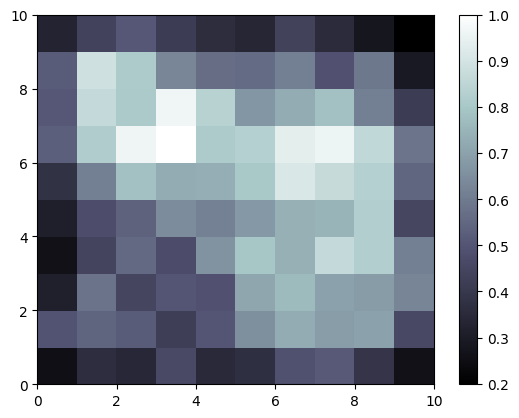

In [22]:
# 숫자 초기화
bone()
# MID map create
pcolor(som.distance_map().T)
# Check where is high or low
colorbar()

하얀 부분이 MID가 큰 사람이므로 비정상적인 사람들.

아마 이 부분의 사람들이 비승인 된 사람들일거야.

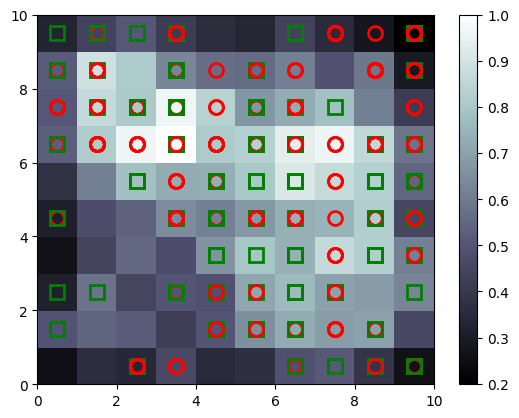

In [24]:
# 숫자 초기화
bone()
# MID map create
pcolor(som.distance_map().T)
# Check where is high or low
colorbar()

# 비승인 받은 사람들 체크

markers = ['o','s']
colors = ['r','g']

for i, xv in enumerate(x):
    w = som.winner(xv) # 위닝노드 가져오기
    plot(w[0] + 0.5,
         w[1]+ 0.5,     # 사각형 중앙에 좌표를 잡기 위해
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

### Finding the frauds

In [25]:
mapping = som.win_map(x)

In [28]:
frauds = np.concatenate((mapping[(3,6)], mapping[(7,6)]), axis = 0)


In [30]:
frauds = sc.inverse_transform(frauds)

In [32]:
pd.DataFrame(frauds)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15661412.0,1.0,48.75,8.500,2.0,8.0,8.0,12.500,1.0,1.0,9.0,0.0,2.0,181.0,1656.0
1,15799785.0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0,16.0
2,15589881.0,1.0,28.92,15.000,2.0,8.0,8.0,5.335,1.0,1.0,11.0,0.0,2.0,0.0,2284.0
3,15602456.0,1.0,48.17,7.625,2.0,9.0,8.0,15.500,1.0,1.0,12.0,0.0,2.0,0.0,791.0
4,15580579.0,1.0,43.25,25.210,2.0,11.0,8.0,0.210,1.0,1.0,1.0,0.0,2.0,760.0,91.0
5,15651868.0,0.0,38.75,1.500,2.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,76.0,1.0
6,15654625.0,0.0,53.33,0.165,2.0,1.0,1.0,0.000,0.0,0.0,0.0,1.0,1.0,62.0,28.0
7,15651460.0,0.0,69.50,6.000,2.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,15636454.0,0.0,52.17,0.000,1.0,1.0,1.0,0.000,0.0,0.0,0.0,0.0,2.0,0.0,1.0


# Mega Case Study

Make a hybrid Deep Learning Model

In [33]:
# 파일 경로 초기화
%cd /content/gdrive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Mega_Case_Study

/content/gdrive/MyDrive/Colab Notebooks/Machine Learning A-Z (Codes and Datasets)/Mega_Case_Study


## Part 1 - Identify the Frauds with the Self-Organizing Map

## Part 2 - Going from Unsupervised to Supervised Deep Learning

### Creating the matrix of features

In [34]:
customers = dataset.iloc[:,1:].values

### Creating the dependent variable

In [36]:
is_fraud = np.zeros(len(dataset))

In [37]:
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

### ANN 적용

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [42]:
import tensorflow as tf

In [43]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, activation='relu', input_dim = 15))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


In [45]:
ann.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['accuracy'])

In [46]:
ann.fit(customers, is_fraud, batch_size = 1 , epochs = 2)

Epoch 1/2
690/690 [==============================] - 3s 2ms/step - loss: 0.6717 - accuracy: 0.7145
Epoch 2/2
690/690 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.9855


### predicting the probabilities of frauds

In [48]:
y_pred = ann.predict(customers)

22/22 [==============================] - 0s 1ms/step


In [ ]:
y_pred =np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)

In [52]:
pd.DataFrame(y_pred)

,0,1
0,15776156.0,0.253541
1,15739548.0,0.253541
2,15662854.0,0.253541
3,15687688.0,0.253541
4,15715750.0,0.253541
...,...,...
685,15808223.0,0.253541
686,15769980.0,0.253624
687,15675450.0,0.253541
688,15776494.0,0.266141


from matplotlib import pyplot as plt
_df_0[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1[1].plot(kind='hist', bins=20, title=1)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x=0, y=1, s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3[0].plot(kind='line', figsize=(8, 4), title=0)
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4[1].plot(kind='line', figsize=(8, 4), title=1)
plt.gca().spines[['top', 'right']].set_visible(False)

In [53]:
y_pred = y_pred[y_pred[:,1].argsort()]

In [55]:
pd.DataFrame(y_pred)

,0,1
0,15776156.0,0.253541
1,15735330.0,0.253541
2,15615176.0,0.253541
3,15807546.0,0.253541
4,15617991.0,0.253541
...,...,...
685,15577771.0,0.309045
686,15700511.0,0.309173
687,15593345.0,0.315200
688,15607986.0,0.319936
